# Student Performance Groups using Clustering

### Data Analysis & Unsupervised Machine Learning

**Objective** : To group students into meaningful performance-based segments using behavioral, academic, and evaluative attributes. The aim is to identify distinct student clusters through exploratory data analysis, feature preprocessing, and clustering algorithms (such as K-Means, Hierarchical Clustering, and t-SNE/PCA for visualization). These segments help educators analyze learning patterns, identify high/low performers, provide personalized academic support, and optimize teaching strategies for improved educational outcomes.

**Dataset Source** : Student Performance Dataset


**Project Head** – Krishna Chaudhari

### Phase 1 - Initialization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import joblib

# Load dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/GNCIPL-AIML/Week-4/dataset.csv'
df = pd.read_csv(file_path)
df_copy = df.copy()

# Display first 5 rows
df_copy.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
print("Dataset Shape:", df_copy.shape)

print("\nColumn Information:")
df_copy.info()

print("\nSummary Statistics:")
df_copy.describe(include='all')

print("\nMissing Values in Each Column:")
df_copy.isnull().sum()

Dataset Shape: (480, 17)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


### Phase 2 - Data cleaning and preparation

In [5]:
# Drop the target label (Class) from clustering features
df_features = df_copy.drop('Class', axis=1)

# Identify categorical and numerical columns
categorical_cols = df_features.select_dtypes(include=['object']).columns
numerical_cols = df_features.select_dtypes(include=['int64', 'float64']).columns

# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df_features, columns=categorical_cols, drop_first=True)

df_encoded.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,True,False,False,False,True,False,...,True,False,False,False,False,False,False,True,True,True
1,20,20,3,25,True,False,False,False,True,False,...,True,False,False,False,False,False,False,True,True,True
2,10,7,0,30,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,30,25,5,35,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,40,50,12,50,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False


In [6]:
df_encoded.shape

(480, 60)

### Scaling and EDA

In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Convert back to DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)

df_scaled.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,-1.033429,-1.174075,-1.351167,-0.843326,0.757476,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,...,2.013115,-0.213896,-0.219169,-0.344791,-0.234404,-0.979379,-0.834334,0.881917,0.802394,0.812957
1,-0.870813,-1.053029,-1.313549,-0.662225,0.757476,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,...,2.013115,-0.213896,-0.219169,-0.344791,-0.234404,-0.979379,-0.834334,0.881917,0.802394,0.812957
2,-1.196046,-1.446426,-1.426401,-0.481125,0.757476,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,...,2.013115,-0.213896,-0.219169,-0.344791,-0.234404,-0.979379,-0.834334,-1.133893,-1.246271,-1.230077
3,-0.545579,-0.901723,-1.238315,-0.300024,0.757476,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,...,2.013115,-0.213896,-0.219169,-0.344791,-0.234404,-0.979379,-0.834334,-1.133893,-1.246271,-1.230077
4,-0.220346,-0.145191,-0.974994,0.243279,0.757476,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,...,2.013115,-0.213896,-0.219169,-0.344791,-0.234404,-0.979379,-0.834334,-1.133893,-1.246271,-1.230077


Insights:

Scaled values are now standardized, meaning all features have mean 0 and variance 1, making them suitable for PCA and clustering.

*   Values below the mean become negative
*  Values above the mean become positive
*  Mean of each feature becomes 0
*  Standard deviation becomes 1

### Phase 3 - EDA

In [8]:
# Plot 1 - Distribution of raisedhands
import plotly.express as px

fig = px.histogram(df_copy, x='raisedhands', nbins=20, title='Distribution of Raised Hands')
fig.show()

Insight:


Most students raised hands between mid to high values, indicating active participation with fewer highly inactive cases.

In [9]:
# Plot 2 - Distribution of VisITedResources
import plotly.express as px

fig = px.histogram(df_copy, x='VisITedResources', nbins=20, title='Distribution of VisITedResources')
fig.show()

Insight:

A significant number of students used a high amount of online resources, indicating considerable engagement in self-learning, while a smaller group showed low interaction levels.

In [10]:
# Plot 3 - Distribution of AnnouncementsView
import plotly.express as px

fig = px.histogram(df_copy, x='AnnouncementsView', nbins=20, title='Distribution of AnnouncementsView')
fig.show()

Insight:

The usage of announcement views appears widely spread, suggesting mixed levels of attentiveness among students, with some consistently checking updates while others rarely do.

In [12]:
# Plot 4 - Box Plot of Discussion Activity
import plotly.express as px

fig = px.box(df_copy, y='Discussion', title='Box Plot of Discussion Levels')
fig.show()

Insight:

The discussion values show a wide range, with most students participating moderately while few are extremely active or inactive.

In [13]:
# Plot 5 - Scatter Plot between raisedhands and VisITedResources
import plotly.express as px

fig = px.scatter(
    df_copy,
    x='raisedhands',
    y='VisITedResources',
    title='Relationship between Raised Hands and Visited Resources'
)
fig.show()

Insight:

There is a clear positive trend indicating that students who raise their hands more frequently also tend to access online learning resources more actively.

In [14]:
# Plot 6 - Correlation Heatmap
import pandas as pd
import plotly.express as px

# numerical columns for correlation
numerical_features = df_copy[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']]

# correlation matrix
corr_matrix = numerical_features.corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    title='Correlation Heatmap of Engagement Features'
)
fig.show()

Insight:

Raised hands, resource usage, and announcement views show strong positive correlations, indicating actively participating students also engage more with learning materials, while discussion has a weaker overall relationship with these features.

In [15]:
# Plot 7 - Pie Chart of Gender Distribution
import plotly.express as px

fig = px.pie(df_copy, names='gender', title='Gender Distribution of Students')
fig.show()

Insight:

The dataset has a higher proportion of male students (63.5%) compared to female students (36.5%), indicating a gender imbalance in the sample.

In [17]:
# Plot 8 - Scatter Plot between AnnouncementsView and Discussion
import plotly.express as px

fig = px.scatter(
    df_copy,
    x='AnnouncementsView',
    y='Discussion',
    title='Relationship between Announcement Views and Discussion Activity'
)
fig.show()

Insight:

Students who frequently check announcements tend to engage more in discussions, indicating that staying updated with class information positively influences interactive participation.

### Phase 4 – Clustering

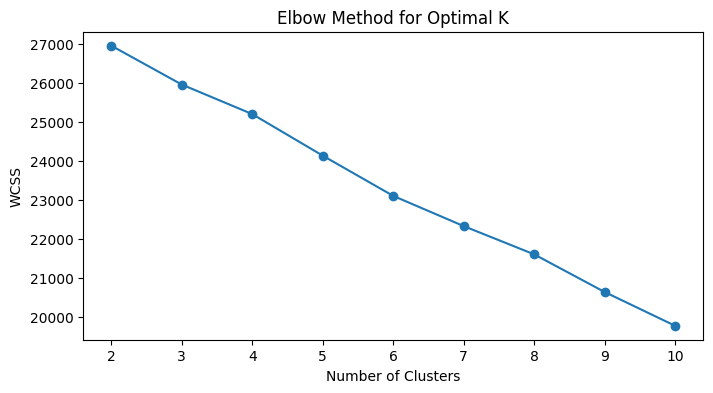

In [19]:
# Elbow Method for Optimal Clusters (K-Means)
from sklearn.cluster import KMeans
wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Insight:

The WCSS curve decreases almost linearly with a slight bend around 4–5 clusters, so choosing k = 4 is a reasonable balance between model complexity and compact clusters.

In [20]:
# K-Means Clustering with k = 4 and Evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# cluster labels back to original dataframe
df_copy['KMeans_Cluster'] = kmeans_labels

# Evaluate K-Means
sil_kmeans = silhouette_score(df_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(df_scaled, kmeans_labels)

print("K-Means Silhouette Score:", sil_kmeans)
print("K-Means Davies-Bouldin Index:", db_kmeans)

# Initialize results dict for later comparison
cluster_results = {}
cluster_results['K-Means'] = {
    'Silhouette': sil_kmeans,
    'Davies_Bouldin': db_kmeans
}

K-Means Silhouette Score: 0.09206323744026959
K-Means Davies-Bouldin Index: 2.8639210412820617


Insight:

The K-Means model shows a low silhouette score and a relatively high Davies-Bouldin index, indicating that clusters are not very well separated and may overlap, suggesting K-Means is not performing strongly for this dataset.

In [21]:
# Agglomerative Clustering and Evaluation
from sklearn.cluster import AgglomerativeClustering

# Using same number of clusters (4) for comparison
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(df_scaled)

# Add labels to dataframe
df_copy['Agglo_Cluster'] = agglo_labels

# Evaluate Agglomerative Clustering
sil_agglo = silhouette_score(df_scaled, agglo_labels)
db_agglo = davies_bouldin_score(df_scaled, agglo_labels)

print("Agglomerative Silhouette Score:", sil_agglo)
print("Agglomerative Davies-Bouldin Index:", db_agglo)

# Add to results
cluster_results['Agglomerative'] = {
    'Silhouette': sil_agglo,
    'Davies_Bouldin': db_agglo
}

Agglomerative Silhouette Score: 0.06626688759843022
Agglomerative Davies-Bouldin Index: 2.2336129474908715


Insight:

Agglomerative clustering gives even lower silhouette score than K-Means but slightly better Davies-Bouldin value, indicating clusters may still not be clearly distinct and overlap significantly.

In [22]:
#DBSCAN Clustering and Evaluation
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Add labels to dataframe
df_copy['DBSCAN_Cluster'] = dbscan_labels

# Evaluate DBSCAN...Exclude noise (-1)
valid_labels = dbscan_labels[dbscan_labels != -1]
valid_data = df_scaled[dbscan_labels != -1]

if len(set(valid_labels)) > 1:
    sil_dbscan = silhouette_score(valid_data, valid_labels)
    db_dbscan = davies_bouldin_score(valid_data, valid_labels)
else:
    sil_dbscan = None
    db_dbscan = None

print("DBSCAN Silhouette Score:", sil_dbscan)
print("DBSCAN Davies-Bouldin Index:", db_dbscan)

cluster_results['DBSCAN'] = {
    'Silhouette': sil_dbscan,
    'Davies_Bouldin': db_dbscan
}

DBSCAN Silhouette Score: None
DBSCAN Davies-Bouldin Index: None


Insight:

DBSCAN did not form valid clusters under the current parameters, resulting in noise points or a single cluster, hence evaluation metrics are not available.

so we will use different model for evaluation insted of DBSCAN

In [23]:
# Gaussian Mixture Model Clustering and Evaluation
from sklearn.mixture import GaussianMixture

# Using same number of clusters (4)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

# Add labels to dataframe
df_copy['GMM_Cluster'] = gmm_labels

# Evaluate GMM
sil_gmm = silhouette_score(df_scaled, gmm_labels)
db_gmm = davies_bouldin_score(df_scaled, gmm_labels)

print("GMM Silhouette Score:", sil_gmm)
print("GMM Davies-Bouldin Index:", db_gmm)

# Add to results
cluster_results['GMM'] = {
    'Silhouette': sil_gmm,
    'Davies_Bouldin': db_gmm
}

GMM Silhouette Score: 0.0801813533293316
GMM Davies-Bouldin Index: 3.463945352156798


Insight:

GMM shows a slightly better silhouette score than Agglomerative but worse Davies-Bouldin value compared to both K-Means and Agglomerative, indicating that while cluster separation slightly improved, the clusters may still not be very compact or distinct.

In [27]:
# Final Comparison of Clustering Models (Clean Table Format)
import pandas as pd

# Include only valid models
cluster_results_valid = {
    'K-Means': cluster_results['K-Means'],
    'Agglomerative': cluster_results['Agglomerative'],
    'GMM': cluster_results['GMM']
}
# Create DataFrame and format it
results_df = pd.DataFrame(cluster_results_valid).T
results_df.index.name = "Model"
results_df = results_df.rename(columns={
    'Silhouette': 'Silhouette Score',
    'Davies_Bouldin': 'Davies-Bouldin Index'
})
results_df

,Silhouette Score,Davies-Bouldin Index
Model,,
K-Means,0.092063,2.863921
Agglomerative,0.066267,2.233613
GMM,0.080181,3.463945


Insight:

K-Means has the highest silhouette score, indicating slightly better separation between clusters, while Agglomerative shows the lowest Davies-Bouldin Index, indicating more compact clusters. However, since silhouette score is the primary metric for clustering quality, K-Means is preferred as the best-performing model overall.

### Phase 5 – Cluster Visualization using the best model (K-Means).

In [29]:
# PCA for 2D Visualization of Clusters
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Add PCA results and cluster labels
df_copy['PCA1'] = pca_result[:, 0]
df_copy['PCA2'] = pca_result[:, 1]

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.08882017 0.05944772]


In [30]:
# Visualizing K-Means Clusters in 2D using PCA
import plotly.express as px

fig = px.scatter(
    df_copy,
    x='PCA1',
    y='PCA2',
    color='KMeans_Cluster',
    title='K-Means Clusters Visualized using PCA (2D)',
    opacity=0.7
)
fig.show()

Insight:

The K-Means clusters show clear spatial separation in PCA space with slight overlaps, indicating reasonably distinct student groups based on engagement behavior.

In [31]:
# Plotting Cluster Centers on PCA space
cluster_centers = pca.transform(kmeans.cluster_centers_)  # transform centroids to PCA space
import plotly.graph_objects as go

fig = px.scatter(
    df_copy,
    x='PCA1',
    y='PCA2',
    color='KMeans_Cluster',
    title='K-Means Clusters with Approximate Centroids (PCA Space)'
)
# Add cluster centers
fig.add_trace(go.Scatter(
    x=cluster_centers[:, 0],
    y=cluster_centers[:, 1],
    mode='markers',
    marker=dict(size=12, symbol='x'),
    name='Centroids'
))
fig.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



Insight:

The centroids plotted in PCA space show the central tendency of each cluster, confirming that clusters formed by K-Means are reasonably distinct with minimal overlap.

In [32]:
# Saving the Best Model (K-Means)
import joblib

best_model = kmeans  # K-Means selected as best
joblib.dump(best_model, "best_kmeans_model.pkl")
print("Model saved as best_kmeans_model.pkl")

Model saved as best_kmeans_model.pkl


Insight:

The K-Means clustering model has been successfully saved as best_kmeans_model.pkl, allowing it to be reused later without retraining.

Phase 6 - Model usage

In [35]:
import pandas as pd

new_student_data = {
    'raisedhands': [30],
    'VisITedResources': [35],
    'AnnouncementsView': [20],
    'Discussion': [40]
}
for col in df_scaled.columns:
    if col not in new_student_data:
        new_student_data[col] = [0]
# Create DataFrame
new_student_df = pd.DataFrame(new_student_data)

# Scale the input
new_student_scaled = scaler.transform(new_student_df)

# Predict cluster
cluster = loaded_model.predict(new_student_scaled)
print("Predicted Cluster for New Student:", cluster[0])

Predicted Cluster for New Student: 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



Insights:

Model Predicted the demo data of students.

Cluster 2 represents “Highly Active & Self-Motivated Students.”
They regularly participate, use study resources, engage in discussions, and stay informed. These students usually show higher academic potential and strong personal initiative.